In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from scipy import signal
#Hacer que las figuras por defecto salgan más grandes
#matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

import warnings
warnings.filterwarnings('ignore')
import utils as U
import UPVlog
from os import getenv
student_id=getenv("USER")
nombre_cuaderno='ExEnero25-P2'+student_id
mylogger=UPVlog.UPVlog(nombre_cuaderno)

# Manejo de espectros y DSF

En este ejercicio 

* Generará una onda triangular
* A partir de la expresión de sus coeficientes del DSF, creará su espectro como lista de tuplas (frec,ampl,fase)
* Estudiará cómo hacer una suma de sinusoides que se aproxime a la señal triangular.

## Generación señal triangular simétrica de media cero

En esta primera parte generará una seña triangular como esta:

Para ello empleará la función *signal.sawtooth()* de *scipy*

**Lea con atención** la [Documentacion sawtooth](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html)

La función generará una onda triangular simétrica **de media cero** , amplitud $A$ y periodo $T$. 

* Además de la amplitud y el periodo, la función recibirá un vector "t" que correspondera a los instantes de tiempo.
* La salida tendrá tantos elementos como "t"
* Es similar a cuando haciamos *np.sin(2*pi*f* **t**)*

In [2]:
def genera_triangular(t,A,T):
    '''
    t: instantes de tiempo
    A: Amplitud de pico
    T: periodo
    '''
    y=None

### BEGIN SOLUTION
    y = - A*signal.sawtooth(2*np.pi/T*t,0.5)
### END SOLUTION

    return y


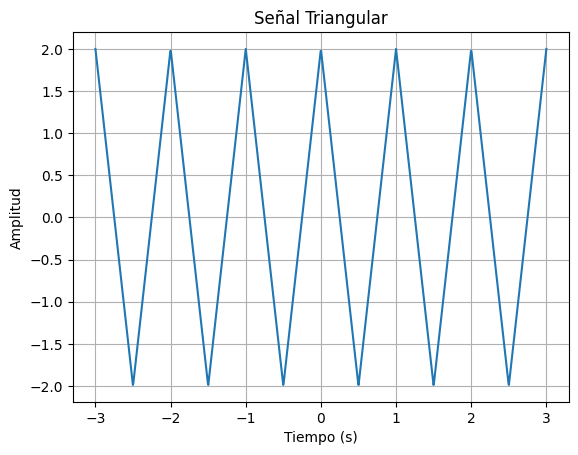

In [3]:
# Celda para comprobar la función

t = np.linspace(-3, 3, 1000)  # Tiempo desde 0 a 6 segundos, con 1000 puntos
T = 1
A=2
mylogger.log("Testing genera triangular")
triang1=genera_triangular(t,A,T)
### BEGIN TESTS
assert triang1 is not None, "Funcion no implementada"
assert len(t)==len(triang1)
### END TESTS

_=plt.plot(t,triang1)
plt.title("Señal Triangular")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

### BEGIN HIDDEN TESTS
def m_genera_triangular(t,A,T):
    '''
    t: instantes de tiempo
    A: Amplitud de pico
    T: periodo
    '''
    y = - A*signal.sawtooth(2*np.pi/T*t,0.5)
    return y
t = np.linspace(-5, 5, 2000)  # Tiempo desde 0 a 6 segundos, con 1000 puntos
T = 0.6
A=1.3
x1=genera_triangular(t,A,T)
x2=m_genera_triangular(t,A,T)

assert x1 is not None
assert len(x1) == len(x2)
assert np.max(np.abs(x1-x2)) < 1e-3
    
### END HIDDEN TESTS

mylogger.log("Success: Testing genera triangular")

___________________
Debe obtener algo similar a 
<div>
<img src="images/triangular.png" width="500"/>
</div>
________________

## Obtención del espectro de la señal triangular

Como cualquier señal periódica, el espectro de la señal triangular tiene componentes en los múltiplos de la frecuencia fundamental:
<center>
$$ f_k = k \frac{1}{T} $$    
</center>

Las **amplitudes complejas del espectro bilateral** vienen dadas por la expresión:

<center>
    $$ c_k = \frac{4A}{\pi^2k^2} \quad \quad k \quad \mathrm{impar}$$ 
</center>
<center>
    $$ c_k = 0 \quad \quad k \quad \mathrm{par}$$ 
</center>

donde $A$ es la amplitud de pico la onda triangular, y k es el número de armónico


Programe una función *espectro_triangular()* con las siguientes condiciones:

* La función recibirá como entrada:

    *  *numcomponentes* : número de componentes espectrales de la señal incluyendo $k=0$
    
    *  *f_0*: frecuencia fundamental de la señal
 
    *  *A*: amplitud de la señal cuadrada
 
* Devolverá como salida:

    * Una lista de tuplas (frec,ampl,fas) con las componentes espectrales del **espectro unilateral** 

In [4]:
def espectro_triangular(numcomponentes,f0, A):

    '''      
    Función que devuelve el espectro unilateral de una onda triangular simétrica de media nula

    numcomponentes : cantidad de armónicos a devolver incluyendo k==0
    
    f0: frecuencia fundamental de la señal = 1/T

    A: Amplitud de pico

    
    lista de tuplas (frec,ampl,fase)
    '''
    espectro = None
    ### BEGIN SOLUTION
    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    Ck = 0.0*ks # Todo ceros
    Ck[1::2]= (4*A)/((np.pi**2)*(ks[1::2]**2))# Los impares: Esto sale de la fórmula
    #Ck[0]=1
    # Lo anterior son bilaterales. Para pasar a unilateral multiplico por 2 excepto el primero
    
    Ck[1:] *= 2.0 
    
    amplitudes=np.abs(Ck)
    fases=np.angle(Ck)

    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
    ### END SOLUTION        
    return espectro

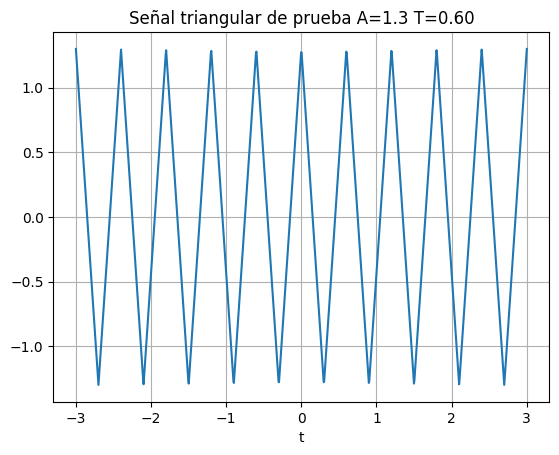

In [5]:
#genere las componentes espectrales de la señal anterior
T=0.6
fo = 1/T
A=1.3
mylogger.log("Success: espectro triangular")
t = np.linspace(-3, 3, 1000)  # Tiempo desde 0 a 6 segundos, con 1000 puntos
triang2=genera_triangular(t,A,T)

_=plt.plot(t,triang2)
_=plt.title(f"Señal triangular de prueba A={A} T={T:.2f}")
_=plt.xlabel("t")
_=plt.grid()
num_componentes=25
espectro=espectro_triangular(num_componentes,fo,A)

### BEGIN TESTS
assert espectro is not None, "Función no implementada"
assert isinstance(espectro, list), "Debe devolver una lista (de tuplas)"
assert len(espectro)==num_componentes, "La cantidad de tuplas no es correcta"
assert len(espectro[0])==3, "Las tuplas deben tener tamaño 3"
ampl0=espectro[0][1]
ampl2=espectro[0][2]
assert abs(ampl0) < 1e-8 and abs(ampl2) < 1e-8, "Los elementos pares del espectro son nulos"

f3=espectro[3][0]
assert abs(f3-3/T)< 1e-5, "Las frecuencias no están bien calculadas"
### END TESTS

### BEGIN HIDDEN TESTS
def m_espectro_triangular(numcomponentes,f0, A):

    '''      
    Función que devuelve el espectro unilateral de una onda triangular simétrica de media nula

    numcomponentes : cantidad de armónicos a devolver incluyendo k==0
    
    f0: frecuencia fundamental de la señal = 1/T

    A: Amplitud de pico

    
    lista de tuplas (frec,ampl,fase)
    '''

    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    Ck = 0.0*ks # Todo ceros
    Ck[1::2]= (4*A)/((np.pi**2)*(ks[1::2]**2))# Los impares: Esto sale de la fórmula
    #Ck[0]=1
    # Lo anterior son bilaterales. Para pasar a unilateral multiplico por 2 excepto el primero
    
    Ck[1:] *= 2.0 
    
    amplitudes=np.abs(Ck)
    fases=np.angle(Ck)

    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
      
    return espectro
TT=0.65
f1 = 1/TT
A1=3.1
nc7=18
e1=espectro_triangular(nc7,f1,A1)
e2=m_espectro_triangular(nc7,f1,A1)
assert e1 is not None
assert len(e1)==len(e2)

for tup1,tup2 in zip(e1,e2):
    v1=np.array(tup1)
    v2=np.array(tup2)
    assert np.max(np.abs(v1-v2)) < 1e-5, f'Diferencia para {v1} {v2}'
    

### END HIDDEN TESTS

mylogger.log("Success: Testing espectro triangular")

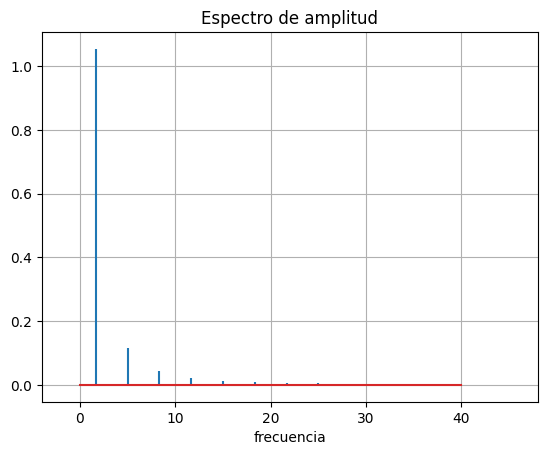

In [6]:
# Ejecutar esta celda para ver el espectro Podemos visualizar el espectro gráficamente
U.dibujaEspectro(espectro)

___________________
Debe obtener algo similar a 
<div>
<img src="images/esp_triang.png" width="500"/>
</div>
________________

## Reconstruccion de la señal como suma de sinusoides

Ahora usando la función creaComponentes (que empleó en las prácticas) generará una matriz, donde cada columna son las muestras de una sinusoide.

La columna k-ésima corresponde con la componente k-ésima del espectro

* Con tantas columnas como componentes
* Con tantas filas como instantes de tiempo


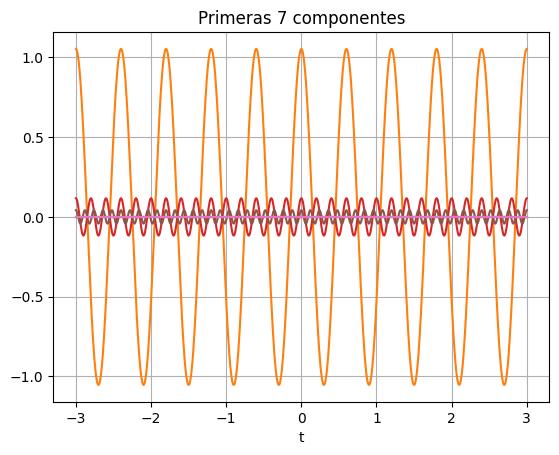

In [7]:
# Obtenemos todas las sinusoides que componen la señal
# SIMPLEMENTE EJECUTE y visualice las 7 primeras componentes
componentes=U.creaComponentes(espectro,t)
_=plt.plot(t,componentes[:,:7])
_=plt.grid()
_=plt.xlabel("t")
_=plt.title("Primeras 7 componentes")


___________________

Debe obtener algo similar a 
<div>
<img src="images/7primer.png" width="500"/>
</div>
________________

Si no es así, revise la función que genera el espectro

### Reconstrucción de la señal sumando 6 armónicos

Obtenga la aproximación de la señal al sumar los 6 primeros armónicos desde $k=0$ hasta $k=5$

Debe observar dos gráficas similares


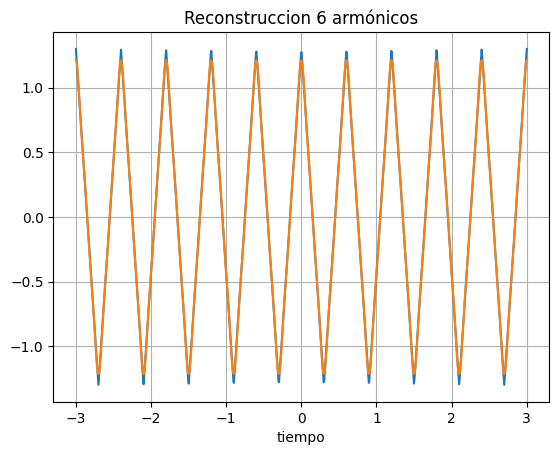

In [8]:
# Calcule aprox6
aprox6=None

### BEGIN SOLUTION

aprox6=np.sum(componentes[:,:6],axis=1)
### END SOLUTION
_=plt.plot(t,triang2)
#Representamos la aprox con 1 sinusoide
_=plt.plot(t,aprox6)
_=plt.title('Reconstruccion 6 armónicos')
_=plt.xlabel('tiempo')
_=plt.grid()
print("Debe observar dos gráficas similares")

In [9]:
## Esta celda contiene tests ocultos
mylogger.log("Testing aprox parcial")
### BEGIN  TESTS
assert aprox6 is not None, "No ha calculado approx6"
### END  TESTS

### BEGIN HIDDEN TESTS
m_approx6=np.sum(componentes[:,:6],axis=1)
assert np.max(np.abs(aprox6-m_approx6)) < 1e-9
### END HIDDEN TESTS
mylogger.log("Success: Testing aprox parcial")

________________________________________________

# Señal triangular simétrica positiva
Ahora vamos a considerar señales triangulares que en vez de oscilar alrededor de cero, "se apoyan en cero".

La figura siguiente ilustra la idea
<div>
<img src="images/triang_pos.png" width="600"/>
</div>

Primero programará una función que genere una señal como la mostrada, que varía entre 0 y $A$ .
Sus argumentos serán:
* A: amplitud de pico
* T: periodo
* t: instantes de tiempo

Puede basarse en la que ya hizo.



In [10]:
def genera_triangular_positiva(t,A,T):
    '''
    t: instantes de tiempo
    A: Amplitud de pico
    T: periodo
    '''
    y=None

### BEGIN SOLUTION
    y = - A/2*signal.sawtooth(2*np.pi/T*t,0.5) + A/2
### END SOLUTION

    return y

Esta grafica debe ser igual a la de la celda anterior


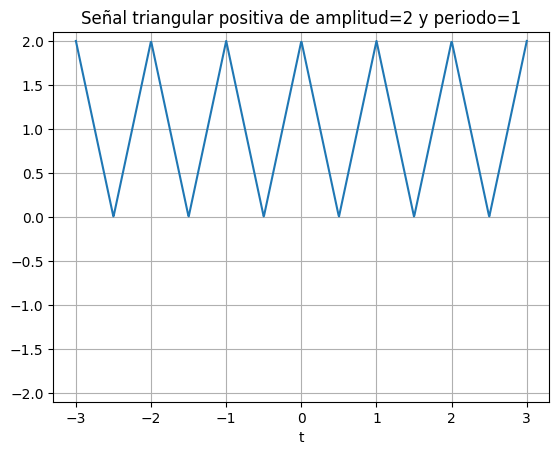

In [11]:
mylogger.log("Testing triang positiva")

### BEGIN TESTS
t = np.linspace(-3, 3, 1000)  # Tiempo desde 0 a 6 segundos, con 1000 puntos
T = 1  # Frecuencia de 1 Hz (1 ciclo por segundo)
f=1/T
A=2
triang3=genera_triangular_positiva(t,A,T)

assert triang3 is not None, "No ha implementado la función"
assert len(triang3)==len(t), "La cantidad de elementos devueltos debe coincidir con t"
_=plt.plot(t,triang3)
_=plt.grid()
_=plt.xlabel('t')
_=plt.title(f'Señal triangular positiva de amplitud={A} y periodo={T}')
_=plt.ylim(-2.1,2.1)
### END TESTS

### BEGIN HIDDEN TESTS
def m_genera_triangular_positiva(t,A,T):
    '''
    t: instantes de tiempo
    A: Amplitud de pico
    T: periodo
    '''

    y = - A/2*signal.sawtooth(2*np.pi/T*t,0.5) + A/2
    return y
kk=m_genera_triangular_positiva(t,A/2,T)    
gg=genera_triangular_positiva(t,A/2,T)   

assert np.max(np.abs(kk-gg)) < 1e-4
### END HIDDEN TESTS
mylogger.log("Success: Testing triang positiva")
print("Esta grafica debe ser igual a la de la celda anterior")


# Espectro Señal triangular simétrica positiva

Basándose en la fórmula que se le dió y aplicando las propiedades vistas en clase, deduzca la expresión de los coeficientes bilaterales del espectro para la señal triangular apoyada en cero y programe una función que devuelva el **espectro unilateral** de dicha señal.



In [12]:

def espectro_triangular_positiva(nc,f0, A):

    '''
    f0: frecuencia fundamental de la señal = 1/T
    
    Función que devuelve el espectro unilateral de una onda senoidal rectificada  como
    lista de tuplas (frec,ampl,fase)
    '''
    espectro = None
    ### BEGIN SOLUTION
    espectro=espectro_triangular(nc,f0, A/2)
    
    dc=list(espectro[0])
    dc[1]=np.abs(A/2)
    dc[2]=np.angle(A)
    espectro[0]=tuple(dc)

   
    ### END SOLUTION        
    return espectro

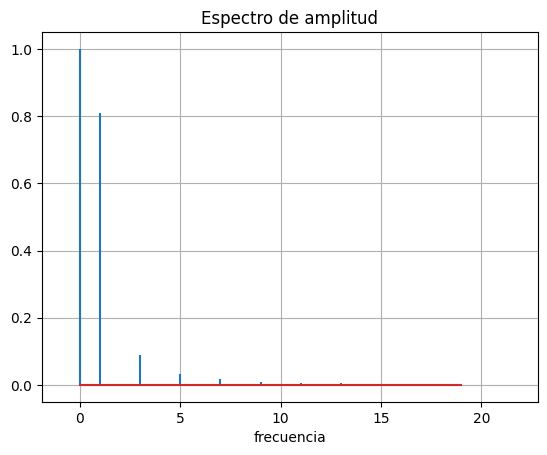

In [13]:
T = 1  # Frecuencia de 1 Hz (1 ciclo por segundo)
f=1/T
A=2
ncompo=20
mylogger.log("Testing Espectro triang positiva")
### BEGIN TESTS
espectropos=espectro_triangular_positiva(ncompo,f,A)

assert espectropos is not None, "Función no completada"
assert len(espectropos) == ncompo, f"El numero de componentes no es correcto {len(espectropos)}" 
assert len(espectropos[0])==3, "Los elementos de las tuplas deben tener 3 elementos"
### END TESTS

### BEGIN HIDDEN TESTS

def m_espectro_triangular_positiva(nc,f0, A):

    '''
    f0: frecuencia fundamental de la señal = 1/T
    
    Función que devuelve el espectro unilateral de una onda senoidal rectificada  como
    lista de tuplas (frec,ampl,fase)
    '''
    
    espectro=m_espectro_triangular(nc,f0, A/2)
    dc=list(espectro[0])
    dc[1]=np.abs(A/2)
    dc[2]=np.angle(A)
    espectro[0]=tuple(dc)
   
    return espectro
espectropos2=m_espectro_triangular_positiva(20,f,A)
assert len(espectropos)==len(espectropos2)

for tup1,tup2 in zip(espectropos,espectropos2):
    v1=np.array(tup1)
    v2=np.array(tup2)
    assert np.max(np.abs(v1-v2)) < 1e-5, f'Diferencia para {v1} {v2}'

### END HIDDEN TESTS
mylogger.log("Success: Testing Espectro triang positiva")
U.dibujaEspectro(espectropos)

_____________

El resultado de la gráfica anterior debe ser similar a este, donde se puede observar que la en $f=0$ la amplitud es distinta de cero
<div>
<img src="images/espectro_pos.png" width="600"/>
</div>
______________